In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

# Print all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Gathering Data:

In [6]:
# Getting the data from the CSV file
snap_data = pd.read_csv(r'..\Datasets\Neighborhoods_with_SNAP_Data.csv')

# Picking out the information that I want
crimes = pd.DataFrame(snap_data.loc[:, 'SNAP_All_csv_Neighborhood']).join(snap_data.loc[:, 'SNAP_All_csv__Murder__2010_':'SNAP_All_csv__Drug_Violations__'])

# A series that will hold the weighted tally
weighted_crime_tally = pd.Series()

# Iterating through each neighborhood to tally them up.
for _, row in crimes.iterrows():
    crime_tally = 0
    
    # Murders and Rapes, 10 pts ea.
    crime_tally += row['SNAP_All_csv__Murder__2010_'] * 10
    crime_tally += row['SNAP_All_csv__Rape__2010_'] * 10

    # Robbery and Agr Assault, 5 pts ea.
    crime_tally += row['SNAP_All_csv__Robbery__2010_'] * 5
    crime_tally += row['F_Agr__Assault__2010_'] * 5

    # Burglary and Auto Theft, 3 pts ea.
    crime_tally += row['SNAP_All_csv__Burglary__2010_'] * 3
    crime_tally += row['SNAP_All_csv__Auto_Theft__2010_'] * 3

    # Drug Violations, 1 pts ea.
    crime_tally += row['SNAP_All_csv__Drug_Violations__'] * 1

    weighted_crime_tally[row['SNAP_All_csv_Neighborhood']] = crime_tally

weighted_crime_tally.sort_values(ascending=False, inplace=True)
weighted_crime_tally.tail(10)

Hays              33
St. Clair         28
Oakwood           26
Chateau           25
East Carnegie     20
Swisshelm Park    18
Summer Hill       18
Ridgemont         16
New Homestead     10
Fairywood          3
dtype: int64

### Plotting Data:

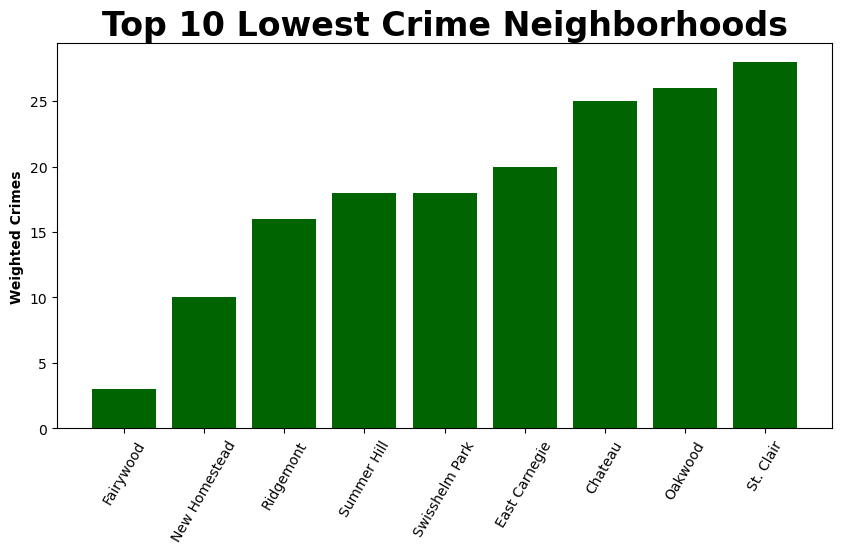

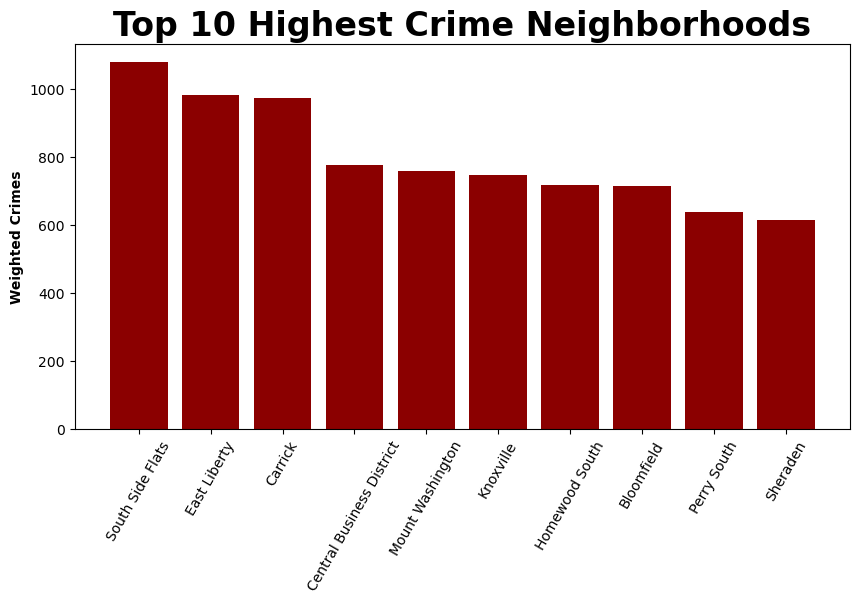

In [7]:
# Lowest Crime
plt.figure(figsize=(10,5))

plt.bar(weighted_crime_tally.index[-1:-10:-1], weighted_crime_tally.values[-1:-10:-1], color='darkgreen')
plt.title("Top 10 Lowest Crime Neighborhoods", fontweight='bold', fontsize=24)
#plt.xlabel("Neighborhood", fontweight='bold')
plt.ylabel("Weighted Crimes", fontweight='bold')
plt.figsize = (10,100)

plt.xticks(rotation=60, rotation_mode='default')

plt.show()

print('\n\n')

# Highest Crime
plt.figure(figsize=(10,5))

plt.bar(weighted_crime_tally.index[:10], weighted_crime_tally.values[:10], color='darkred')
plt.title("Top 10 Highest Crime Neighborhoods", fontweight='bold', fontsize=24)
#plt.xlabel("Neighborhood", fontweight='bold')
plt.ylabel("Weighted Crimes", fontweight='bold')
plt.figsize = (10,100)

plt.xticks(rotation=60, rotation_mode='default')

plt.show()

### Normalizing Data

In [8]:
# This gets a floating-point number for each neighborhood that represents the percentage of crime as related to the mean.
# So, a neighborhood with above average crime will be >1, and below average crime will be <1.
normalized_crime_data = weighted_crime_tally.div(weighted_crime_tally.mean())